In [ ]:
# Importando as bibliotecas necessárias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
# Carregando os dados do arquivos CVS
from google.colab import files
uploaded = files.upload()

Saving clientes_ficticios.csv.csv to clientes_ficticios.csv.csv


In [ ]:
import pandas as pd

# Nome correto do arquivo enviado (verifique no painel esquerdo do Colab ou no nome exato que você subiu)
df = pd.read_csv("clientes_ficticios.csv.csv")

# Visualize as primeiras linhas para confirmar
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,35,85,14
1,2,Female,43,100,21
2,3,Male,61,42,48
3,4,Male,51,80,20
4,5,Male,27,59,8


In [ ]:
# Verificando o formato dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              100 non-null    int64 
 1   Gender                  100 non-null    object
 2   Age                     100 non-null    int64 
 3   Annual Income (k$)      100 non-null    int64 
 4   Spending Score (1-100)  100 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 4.0+ KB


In [ ]:
# Estatísticas descritivas básicas
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,100.000000,100.000000,100.00000,100.000000
mean,50.500000,43.540000,94.11000,46.680000
std,29.011492,14.301529,38.54445,28.336321
min,1.000000,18.000000,16.00000,2.000000
25%,25.750000,31.000000,65.75000,24.000000
50%,50.500000,43.500000,100.50000,44.500000
75%,75.250000,56.000000,127.00000,65.250000
max,100.000000,69.000000,148.00000,99.000000


In [ ]:
# Verificando valores ausentes (null)
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


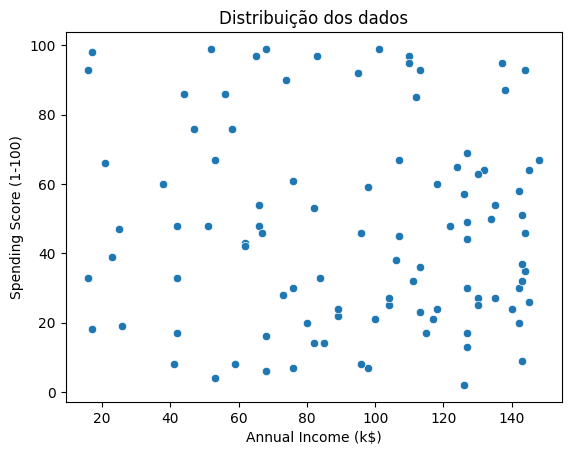

In [ ]:
# Visualizando as distributivas dos dados com gráfico de dispersão
sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)")
plt.title("Distribuição dos dados")
plt.show()

In [ ]:
# Selecionando apenas variáveis relevantes para o agrupamento
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,85,14
1,100,21
2,42,48
3,80,20
4,59,8


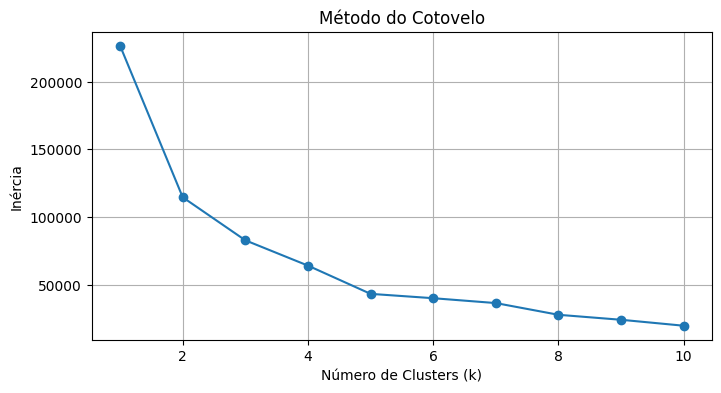

In [ ]:
# Usando o método do cotovelo para identificar o número ideal de clusters
inertia = []  # Lista para armazenar a inércia de cada modelo

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)  # Inércia é a soma das distâncias dentro dos clusters

# Plotando o gráfico do cotovelo
plt.figure(figsize=(8,4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Método do Cotovelo")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Inércia")
plt.grid(True)
plt.show()


In [ ]:
print(df.columns.tolist())

['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']


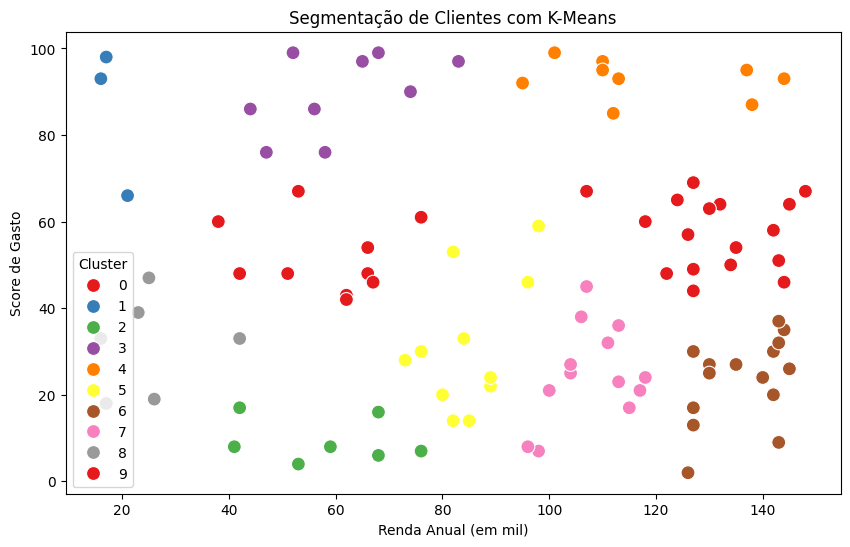

In [ ]:
# Visualizando os clusters encontados com base em renda e score de gasto
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Cluster", palette='Set1', s=100)
plt.title("Segmentação de Clientes com K-Means")
plt.xlabel("Renda Anual (em mil)")
plt.ylabel("Score de Gasto")
plt.legend(title="Cluster")
plt.show()

In [ ]:
# Analisando a média das variáveis em cada grupo para entender os perfis
df.groupby("Cluster")[['Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Annual Income (k$),Spending Score (1-100)
Cluster,,
0,131.235294,57.411765
1,18.000000,85.666667
2,58.142857,9.428571
3,60.777778,89.555556
4,117.777778,92.888889
5,84.909091,31.181818
6,136.266667,23.600000
7,107.846154,24.923077
8,24.833333,31.500000
